# Import libraries and data


In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 697.7 kB/s eta 0:00:0000:0100:01


In [2]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python


In [3]:
#import libraries
import pandas as pd
import numpy as np
import yfinance


In [42]:
#get the data
#data = pd.read_csv("Daily Bike Sharing.csv", 
  #                 index_col = "dteday", 
               
 #                  parse_dates = True)
#data.head(1)

#load the data

data = yfinance.download (tickers = "IOC.NS",start="2010-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)

data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-07-10,101.000000,101.449997,97.099998,97.400002,24042759
2023-07-11,97.800003,98.900002,96.900002,98.099998,17508261
2023-07-12,98.250000,99.349998,97.699997,97.900002,14979586
2023-07-13,98.400002,98.699997,96.000000,96.199997,11491737
2023-07-14,96.500000,97.650002,95.800003,96.449997,18942597


In [43]:
data["Date"] = data.index

#Data Transformation

In [44]:
#renaming variable
data = data.rename(columns = {'Close' : 'y'})
data.head(1)

,Open,High,Low,y,Volume,Date
Date,,,,,,
2010-03-08,27.545255,27.607465,27.203105,27.340855,3420936,2010-03-08


In [45]:
#index
data = data.asfreq("B")
data.index

DatetimeIndex(['2010-03-08', '2010-03-09', '2010-03-10', '2010-03-11',
               '2010-03-12', '2010-03-15', '2010-03-16', '2010-03-17',
               '2010-03-18', '2010-03-19',
               ...
               '2023-07-03', '2023-07-04', '2023-07-05', '2023-07-06',
               '2023-07-07', '2023-07-10', '2023-07-11', '2023-07-12',
               '2023-07-13', '2023-07-14'],
              dtype='datetime64[ns]', name='Date', length=3485, freq='B')

#Visualization

<Axes: xlabel='Date'>

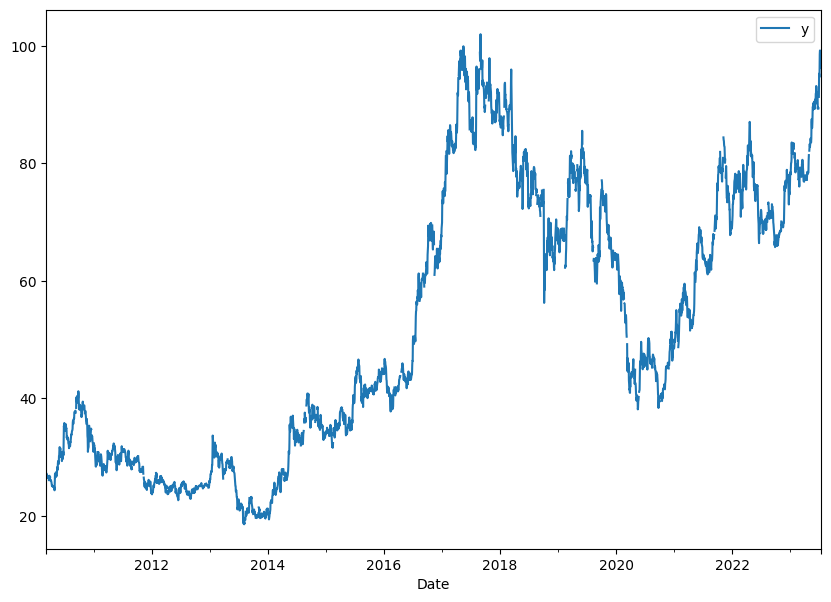

In [46]:
#viz
data["y"].plot(figsize = (10, 7), legend = True)

In [47]:
data = data.dropna()

#Stationarity

In [48]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(data['y'])
print('Augmented Dickey Fuller p-value: %F' % stationarity[1])

Augmented Dickey Fuller p-value: 0.790022


#Training and Test Set

In [49]:
#Training and test set
test_days = 760
training_set = data.iloc[:-test_days, :]
test_set = data.iloc[-test_days:, :]
test_set.tail(1)

,Open,High,Low,y,Volume,Date
Date,,,,,,
2023-07-14,96.5,97.650002,95.800003,96.449997,18942597.0,2023-07-14


#Forecasting Model

In [50]:
#exogenous variables
train_exog = training_set.iloc[:,1:]
test_exog = test_set.iloc[:,1:]
test_exog.head()

,High,Low,y,Volume,Date
Date,,,,,
2020-06-25,46.968016,45.155402,45.341995,38596161.0,2020-06-25
2020-06-26,47.954291,45.715178,47.527794,69744400.0,2020-06-26
2020-06-29,48.354138,46.115024,46.434898,32176755.0,2020-06-29
2020-06-30,47.154610,45.182060,45.501934,24516958.0,2020-06-30
2020-07-01,45.928432,44.942157,45.661869,21495316.0,2020-07-01


In [51]:
test_exog = test_exog.drop("Date",axis=1)
train_exog = train_exog.drop("Date",axis=1)

In [61]:
test_exog = test_exog.drop(["y","Low","High"],axis=1)
train_exog = train_exog.drop(["y","Low","High"],axis=1)

In [67]:
return_train  = training_set['y'].pct_change()

In [69]:
return_train = return_train.dropna()

In [70]:
#Libraries
from pmdarima import auto_arima

In [62]:
#forecasting model
model = auto_arima(y = return_train,
                   X = train_exog,
                   m = 7,
                   seasonal = True,
                   stepwise = False)

/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [63]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2537
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -3711.078
Date:                Fri, 14 Jul 2023   AIC                           7432.156
Time:                        17:16:01   BIC                           7461.348
Sample:                             0   HQIC                          7442.747
                               - 2537                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0081      0.020      0.395      0.693      -0.032       0.048
Volume      7.408e-09   8.48e-10      8.734      0.000    5.75e-09    9.07e-09
ma.L1          0.0205      0.010      2.048      0.041       0.001       0.040
ma.L2         -0.0739      0.014     -5.233      0.000      -0.102      -0.046
sigma2         1.0961      0.015     72.361      0.000       1.066       1.126
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11498.32
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               8.39   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.17e+14. Standard errors may be unstable.
"""

In [64]:
test_exog

,Volume
Date,
2020-06-25,38596161.0
2020-06-26,69744400.0
2020-06-29,32176755.0
2020-06-30,24516958.0
2020-07-01,21495316.0
...,...
2023-07-10,24042759.0
2023-07-11,17508261.0
2023-07-12,14979586.0


In [65]:
#predictions
predictions_sarimax = pd.Series(model.predict(n_periods= test_days,
                              X = test_exog)).rename("SARIMAX")
predictions_sarimax.index = test_set.index                              
predictions_sarimax

/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Date
2020-06-25    46.335632
2020-06-26    46.654767
2020-06-29    46.384529
2020-06-30    46.335840
2020-07-01    46.321510
                ...    
2023-07-10    52.388659
2023-07-11    52.348307
2023-07-12    52.337629
2023-07-13    52.319845
2023-07-14    52.383093
Name: SARIMAX, Length: 760, dtype: float64

<Axes: xlabel='Date'>

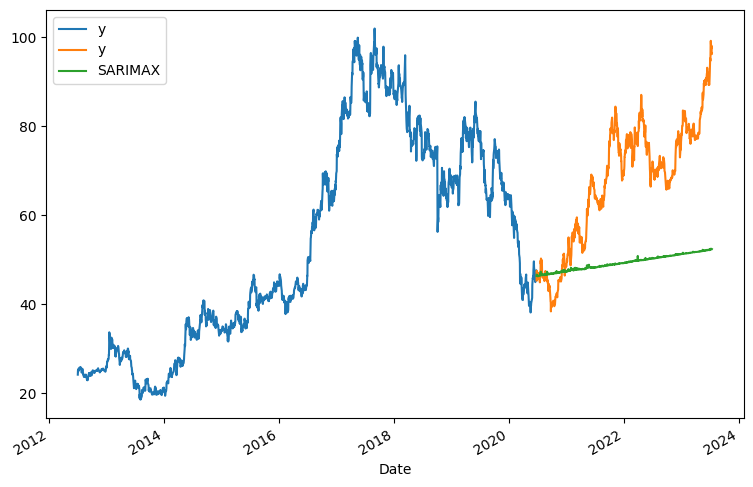

In [66]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_sarimax.plot(legend = True)

#Model assessment

In [36]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_sarimax),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_sarimax)), 0))

0.0
0.0


In [37]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_sarimax)

5.597056091334673e-10

#export forecasts

In [22]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble


In [23]:
predictions_sarimax.to_csv('predictions_sarimax.csv', index = True)